In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report

In [114]:
raw_d = pd.read_csv("/Users/nikhil/Downloads/titanic/train.csv")

In [115]:
raw_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
data = raw_d.copy()

In [117]:
data = data.drop(['Name', 'Cabin', 'PassengerId', 'Ticket'], axis=1)

In [118]:
data['Age'] = data['Age'].fillna(np.round(data["Age"].mean()))

In [122]:
data['Sex'] = data['Sex'].apply(lambda s: 0 if s == 'male' else 1)

In [119]:
# data.loc[data['Embarked'] == 'S'] = 0
# data.loc[data['Embarked'] == 'C'] = 1
# data.loc[data['Embarked'] == 'Q'] = 2
data = data.replace({'Embarked': {'S':0, 'C':1, 'Q':2}})

In [120]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [123]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,30.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [125]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [126]:
reg = LinearRegression()

In [127]:
tree_reg = DecisionTreeRegressor()

In [128]:
log_reg = LogisticRegression()

In [129]:
reg.fit(X,y)

LinearRegression()

In [130]:
tree_reg.fit(X,y)

DecisionTreeRegressor()

In [131]:
log_reg.fit(X,y)

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
reg.coef_

array([-1.75313075e-01,  5.04040426e-01, -5.93150066e-03, -4.19036805e-02,
       -1.59754634e-02,  3.26621658e-04,  4.18422176e-02])

In [133]:
reg.intercept_

0.789830038231724

In [134]:
log_reg.coef_

array([[-1.08984738e+00,  2.58615635e+00, -3.92709650e-02,
        -3.17789605e-01, -7.37683604e-02,  2.30882603e-03,
         2.63538607e-01]])

In [135]:
log_reg.intercept_

array([2.15774628])

In [136]:
prediction = reg.predict(X)
prediction

array([ 9.38621239e-02,  9.16381570e-01,  6.16300697e-01,  8.86394795e-01,
        5.89175932e-02,  1.72392891e-01,  3.11155343e-01,  1.17224857e-01,
        5.79466170e-01,  8.69963616e-01,  6.91780673e-01,  7.83202156e-01,
        1.47890103e-01, -7.90036191e-02,  6.87455581e-01,  6.22237724e-01,
        1.61634916e-01,  2.65504949e-01,  5.48030227e-01,  6.34188277e-01,
        2.40093527e-01,  2.41778946e-01,  7.65265674e-01,  4.60030013e-01,
        5.85676279e-01,  4.31005053e-01,  1.30147851e-01,  4.30057978e-01,
        6.76244171e-01,  8.85247314e-02,  4.28153368e-01,  9.88407773e-01,
        6.76201971e-01,  5.11543712e-02,  4.75212244e-01,  3.40474581e-01,
        1.30149223e-01,  1.41958602e-01,  5.83236055e-01,  6.88500549e-01,
        4.91862271e-01,  7.48049170e-01,  1.30366949e-01,  9.07018089e-01,
        7.41490678e-01,  8.85750965e-02,  1.32789182e-01,  6.76201971e-01,
        5.10615450e-02,  6.25074411e-01,  5.17429189e-02,  1.41876947e-01,
        8.52913812e-01,  

In [137]:
tree_pred = tree_reg.predict(X)
tree_pred

array([0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.25      , 0.        , 1.        ,
       0.        , 0.33333333, 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.875     , 0.        , 0.        ,
       0.        , 0.14285714, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.875     , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [138]:
log_pred = log_reg.predict(X)
log_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [139]:
prediction = prediction.round(0)
prediction

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
       -0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1., -0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
       -0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0., -0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1., -0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1., -0., -0.,  0.,  0.,
        1.,  0.,  0., -0., -0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0., -0.,  1.,  0.,  0.,  0

In [140]:
tree_pred = tree_pred.round(0)
tree_pred

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [141]:
print(accuracy_score(data['Survived'], prediction))

0.8013468013468014


In [142]:
print(accuracy_score(data['Survived'], tree_pred))

0.9797979797979798


In [143]:
print(accuracy_score(data['Survived'], log_pred))

0.8035914702581369


In [144]:
print(confusion_matrix(data['Survived'], prediction))

[[476  73]
 [104 238]]


In [145]:
print(confusion_matrix(data['Survived'], tree_pred))

[[547   2]
 [ 16 326]]


In [146]:
print(confusion_matrix(data['Survived'], log_pred))

[[474  75]
 [100 242]]


In [147]:
print(classification_report(data['Survived'], prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [148]:
print(classification_report(data['Survived'], tree_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       549
           1       0.99      0.95      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.97      0.98       891
weighted avg       0.98      0.98      0.98       891



In [149]:
print(classification_report(data['Survived'], log_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [150]:
r2_score(y, prediction) 

0.16005176876617755

In [151]:
r2_score(y, tree_pred)

0.91458153580673

In [152]:
r2_score(y, log_pred)

0.16954270923209647

In [153]:
mean_squared_error(y,prediction)

0.19865319865319866

In [154]:
mean_squared_error(y, tree_pred)

0.020202020202020204

In [155]:
mean_squared_error(y, log_pred)

0.19640852974186307

In [156]:
test_data = pd.read_csv("/Users/nikhil/Downloads/titanic/test.csv")

In [157]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [158]:
test_data['Age'] = test_data['Age'].fillna(np.round(test_data["Age"].mean()))
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [159]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,30.0,0,0,8.0500,S


In [160]:
test_data['Fare'] = test_data['Fare'].fillna(np.round(test_data["Fare"].mean()))
test_data.info()
test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,30.0,0,0,8.0500,S


In [161]:
test_data['Sex'] = test_data['Sex'].apply(lambda s: 0 if s == 'male' else 1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,30.0,0,0,8.0500,S
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,S
416,3,0,30.0,0,0,8.0500,S


In [162]:
test_data = test_data.replace({'Embarked': {'S':0, 'C':1, 'Q':2}})
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,30.0,0,0,8.0500,0


In [276]:
test_prediction = reg.predict(test_data)

In [277]:
test_tree_pred = tree_reg.predict(test_data)

In [278]:
test_log_pred = log_reg.predict(test_data)

In [291]:
test_prediction = test_prediction.round(0)
test_prediction

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
      

In [280]:
test_tree_pred = test_tree_pred.round(0)
test_tree_pred

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [281]:
test_log_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [169]:
data1 = pd.read_csv("/Users/nikhil/Downloads/titanic/test.csv")

In [170]:
df = pd.DataFrame(data1['PassengerId'], columns=['PassengerId'])
df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [289]:
df['Survived'] = test_prediction

In [290]:
df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [285]:
df['PassengerId'] = df['PassengerId'].astype("int32")
df['Survived'] = df['Survived'].astype("int32")

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int32
dtypes: int32(2)
memory usage: 3.4 KB


In [287]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [288]:
df.to_csv('Submission.csv', index=False)

In [14]:
X = raw_d['PassengerId']
y = raw_d['Survived']

In [21]:
X = X.values.reshape(-1,1)
X.shape

(891, 1)

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.coef_

array([3.77301995e-05])

In [25]:
prediction = lr.predict(X_train)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
r2_score(y_train, prediction)

0.0003991793724562598

In [29]:
mean_squared_error(y_train, prediction)

0.2346304539517436

In [30]:
y_pred_test = lr.predict(X_test)

In [31]:
r2_score(y_test, y_pred_test)

-0.010112244968109696

In [32]:
mean_squared_error(y_test, y_pred_test)

0.2449540321276556

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
print(accuracy_score(y_test, y_pred_test))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [51]:
cde = pd.read_csv("/Users/nikhil/Downloads/canada_exercise.csv")
cde

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


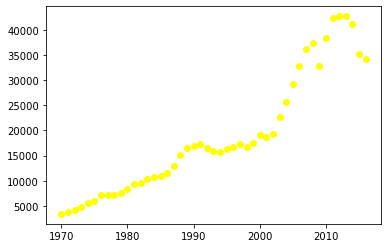

In [43]:
plt.scatter(cde['year'], cde['per capita income (US$)'], color='yellow')

In [45]:
lr.fit(cde[['year']], cde['per capita income (US$)'])

LinearRegression()

In [50]:
lr.predict([[2020], [2021]])

array([41288.69409442, 42117.15916964])

In [222]:
da = pd.read_excel("/Users/nikhil/Downloads/titanic3.xls")

In [223]:
da.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [224]:
da.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [225]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [227]:
X_data = da[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [228]:
X_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [229]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [230]:
X_data['age'] = X_data['age'].fillna(round(X_data['age'].mean(), 2))

/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_35843/4021383519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['age'] = X_data['age'].fillna(round(X_data['age'].mean(), 2))


In [231]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [232]:
X_data['fare'] = X_data['fare'].fillna(X_data['fare'].mode()[0])
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_35843/1061989356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['fare'] = X_data['fare'].fillna(X_data['fare'].mode()[0])


In [235]:
X_data = X_data.replace({'embarked': {'S':0, 'C':1, 'Q':2}})

In [236]:
X_data['embarked'] = X_data['embarked'].fillna(X_data['embarked'].mode()[0])
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 81.9+ KB


In [238]:
X_data['sex'] = X_data['sex'].apply(lambda s: 0 if s == 'male' else 1)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [211]:
from sklearn.model_selection import train_test_split

In [239]:
X = X_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = X_data[['survived']]

In [240]:
X.shape

(1309, 7)

In [241]:
y.shape

(1309, 1)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [243]:
reg.fit(X_train, y_train)

LinearRegression()

In [244]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [245]:
log_reg.fit(X_train, y_train)

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [246]:
reg_prediction = reg.predict(X_test)

In [263]:
reg_prediction = reg_prediction.round(0)

In [247]:
tree_prediction = tree_reg.predict(X_test)

In [265]:
tree_prediction = tree_prediction.round(0)

In [248]:
log_prediction = log_reg.predict(X_test)

In [266]:
log_prediction = log_prediction.round(0)

In [249]:
reg.coef_

array([[-1.76991213e-01,  4.64165189e-01, -6.09842326e-03,
        -3.54472977e-02,  7.32537362e-03,  1.86194388e-04,
         4.02160396e-02]])

In [250]:
reg.intercept_

array([0.79480606])

In [251]:
log_reg.coef_

array([[-1.04767034e+00,  2.32772176e+00, -3.77833923e-02,
        -2.33895498e-01,  4.87670216e-02,  1.12541006e-03,
         2.43960018e-01]])

In [252]:
log_reg.intercept_

array([2.00562305])

In [267]:
r2_score(reg_prediction, y_test)

0.23682877406281633

In [268]:
r2_score(tree_prediction, y_test)

0.05611528362948037

In [269]:
r2_score(log_prediction, y_test)

0.22144702842377273

In [270]:
mean_squared_error(reg_prediction, y_test)

0.17557251908396945

In [271]:
mean_squared_error(tree_prediction, y_test)

0.22519083969465647

In [272]:
mean_squared_error(log_prediction, y_test)

0.17557251908396945

In [273]:
print(accuracy_score(reg_prediction, y_test))

0.8244274809160306


In [274]:
print(accuracy_score(tree_prediction, y_test))

0.7748091603053435


In [275]:
print(accuracy_score(log_prediction, y_test))

0.8244274809160306


In [ ]:
test_prediction